In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import yfinance as yf

In [2]:
aapl = yf.Ticker('AAPL')
actual_hist = aapl.history(start = '2017-12-29', end= '2019-12-30', auto_adjust = False)
#first and last value
print(actual_hist.iloc[[0,-1]])

                                Open       High        Low      Close  \
Date                                                                    
2017-12-29 00:00:00-05:00  42.630001  42.647499  42.305000  42.307499   
2019-12-27 00:00:00-05:00  72.779999  73.492500  72.029999  72.449997   

                           Adj Close     Volume  Dividends  Stock Splits  
Date                                                                      
2017-12-29 00:00:00-05:00  39.632290  103999600        0.0           0.0  
2019-12-27 00:00:00-05:00  69.922745  146266000        0.0           0.0  


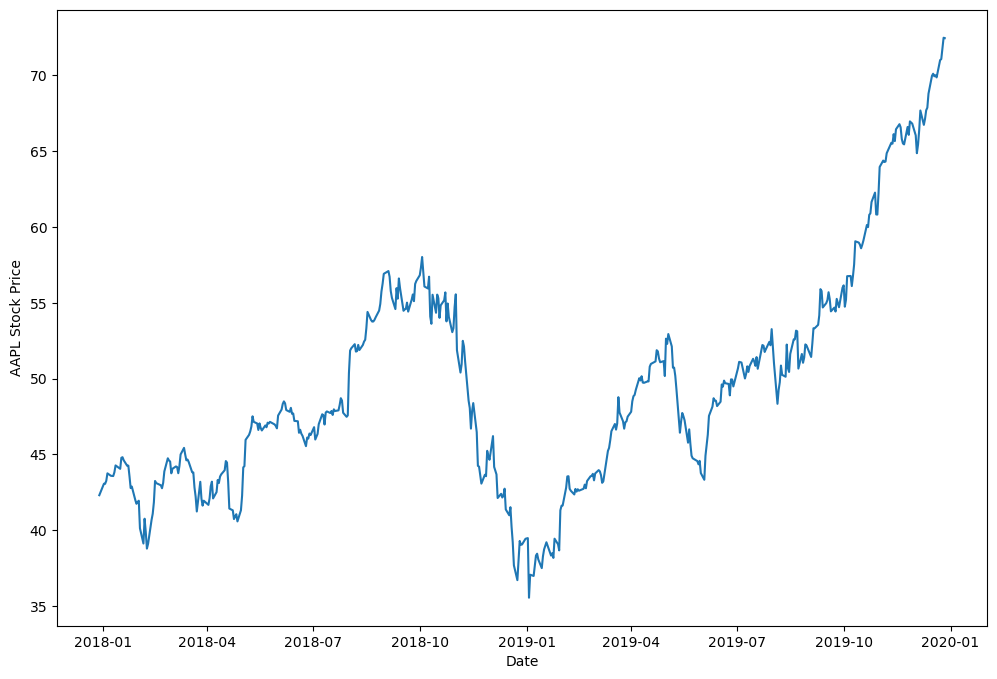

In [13]:
fig = plt.figure(figsize=(12,8))
plt.plot(actual_hist['Close'])
plt.xlabel('Date')
plt.ylabel('AAPL Stock Price')
plt.show()

In [4]:
n_t = len(actual_hist)
print('Number of Days:', n_t)
#paths number
n_mc = 10000

St = pd.DataFrame(0., index = actual_hist.index, columns = list(range(1, n_mc +1)))
St.iloc[0] = actual_hist['Close'].iloc[0]

#annualized vol
sigma = 0.25
#drift
mu = 0.08
#StepSize (1 day in unit of year)

dt = 2./(n_t - 1)
print('Daily Vol:', sigma*np.sqrt(dt))

Number of Days: 502
Daily Vol: 0.015795600590164084


In [5]:
for i in range(1, n_t):
    dS_2_S = mu*dt + sigma*np.sqrt(dt)*np.random.randn(n_mc)
    St.iloc[i] = St.iloc[i-1] + St.iloc[i-1] * dS_2_S

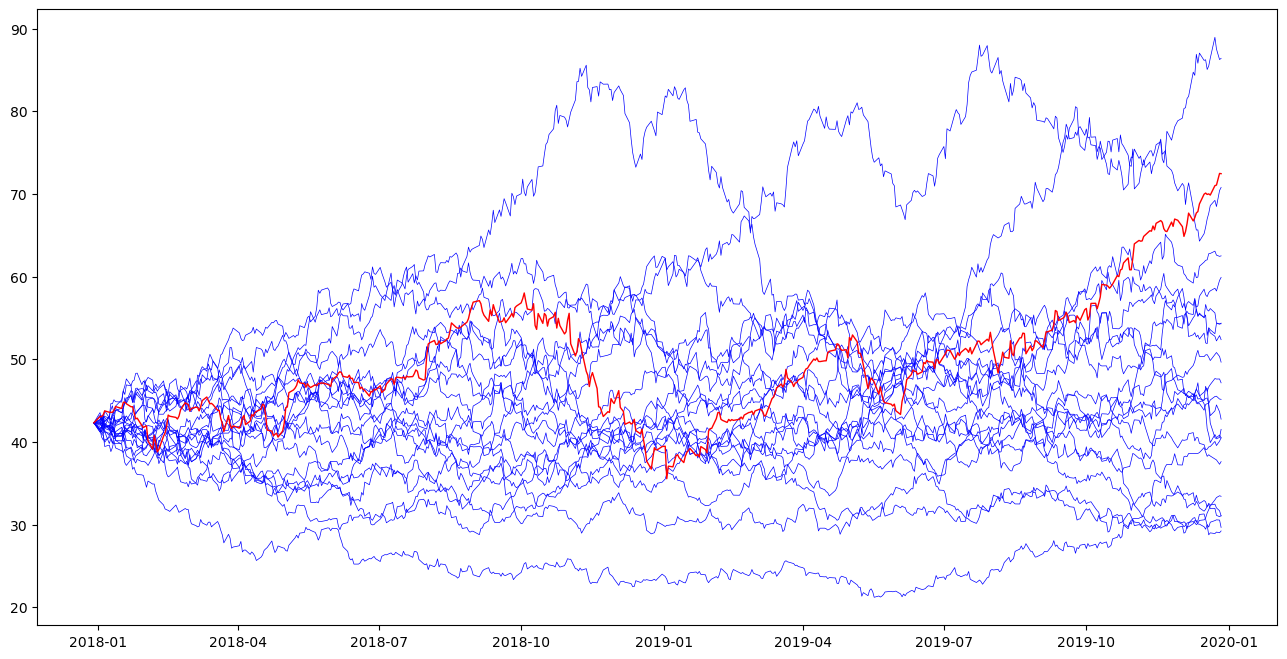

In [6]:
fig = plt.figure(figsize= (16,8))
axl = fig.add_subplot(111)

for i in np.random.choice(np.array(range(1, n_mc + 1)), size = 20):
    axl.plot(St[i], 'b', lw = 0.5)
axl.plot(actual_hist['Close'], 'r', lw = 1)
plt.show()

In [7]:
St_mc_mean = St.mean(axis=1)
#Mean Theory
St_th_mean = actual_hist['Close'].iloc[0] * np.exp(mu*np.arange(n_t) / n_t * 2.)
St_th_mean = pd.DataFrame(St_th_mean, index = St_mc_mean.index)

print('Expected value from MC:', St_mc_mean.iloc[-1])
print('Theoretical Expected Value:', St_th_mean.iloc[-1])

Expected value from MC: 49.38445011552
Theoretical Expected Value: 0    49.632488
Name: 2019-12-27 00:00:00-05:00, dtype: float64


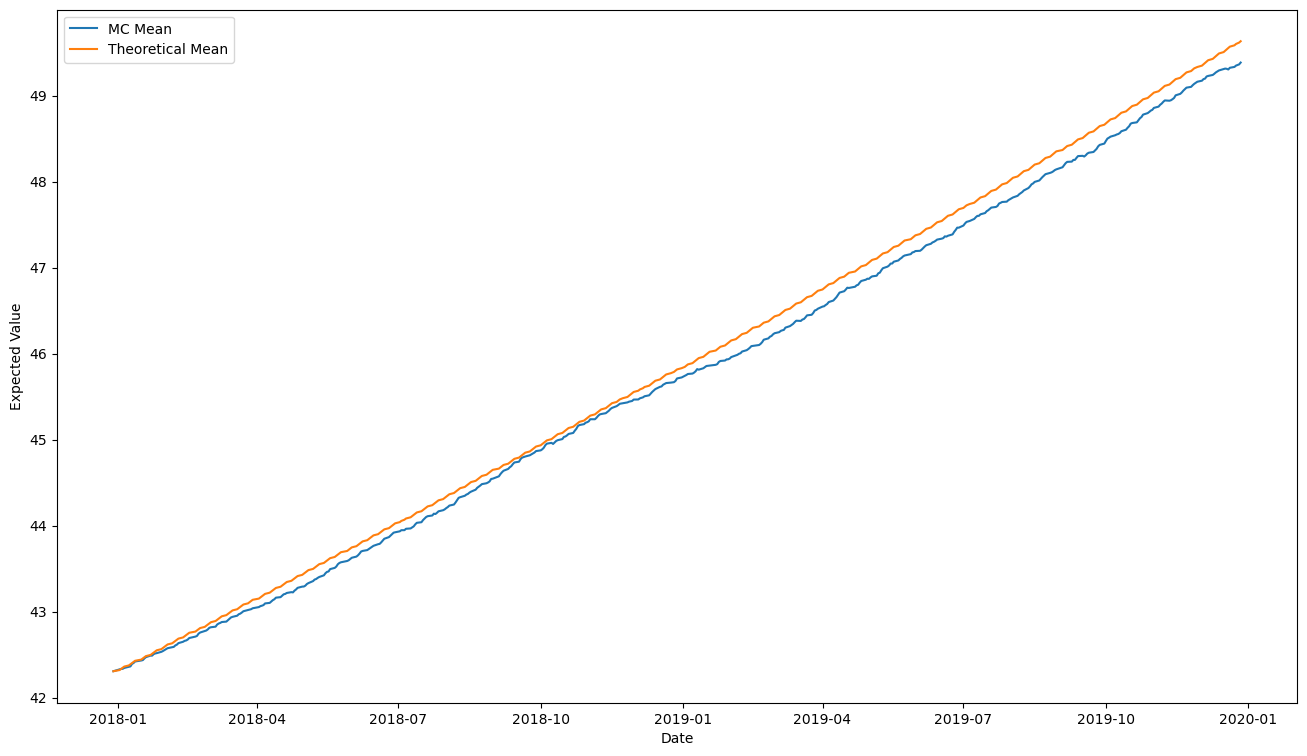

In [8]:
fig = plt.figure(figsize=(16,9))
axl = fig.add_subplot(111)
plt.plot(St_mc_mean)
plt.plot(St_th_mean)
plt.xlabel('Date')
plt.ylabel('Expected Value')
plt.legend(['MC Mean', 'Theoretical Mean'])
plt.show()

In [9]:
St_mc_median = St.median(axis=1)
#Median Theory
St_th_median = actual_hist['Close'].iloc[0] * np.exp((mu-0.5*sigma*sigma)*np.arange(n_t) / n_t * 2.)
St_th_median = pd.DataFrame(St_th_median, index = St_mc_median.index)

print('Expected value from MC:', St_mc_median.iloc[-1])
print('Theoretical Expected Value:', St_th_median.iloc[-1])

Expected value from MC: 46.31539126621487
Theoretical Expected Value: 0    46.631213
Name: 2019-12-27 00:00:00-05:00, dtype: float64


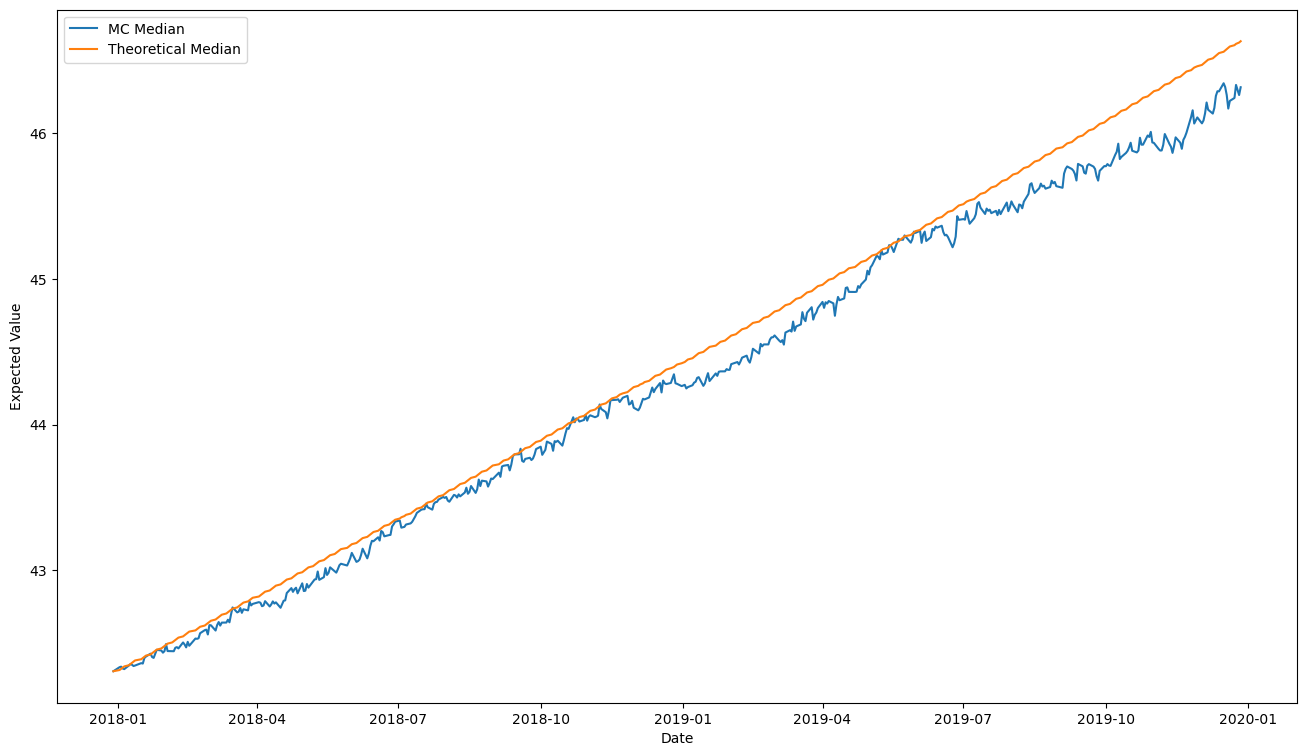

In [10]:
fig = plt.figure(figsize=(16,9))
axl = fig.add_subplot(111)
plt.plot(St_mc_median)
plt.plot(St_th_median)
plt.xlabel('Date')
plt.ylabel('Expected Value')
plt.legend(['MC Median', 'Theoretical Median'])
plt.show()

In [11]:
def generate_gbm_mc(actual_hist, n_mc, mu=0.08, sigma =0.25):
    n_t = len(actual_hist)
    print('Number of Days:', n_t)
   
    St = pd.DataFrame(0., index = actual_hist.index, columns = list(range(1, n_mc +1)))
    St.iloc[0] = actual_hist['Close'].iloc[0]
    
    dt = 2./(n_t - 1)
    print('Daily Vol:', sigma*np.sqrt(dt))

    for i in range(1, n_t):
        dS_2_S = mu*dt + sigma*np.sqrt(dt)*np.random.randn(n_mc)
        St.iloc[i] = St.iloc[i-1] + St.iloc[i-1] * dS_2_S
    return St

In [12]:
St = generate_gbm_mc(actual_hist, n_mc=20000)

Number of Days: 502
Daily Vol: 0.015795600590164084
